In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We consider a database containing geometrical features of iris plants.


In [ ]:
data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    header=None,
).to_numpy()
A = data[:, :4].T.astype(np.float64)
labels = data[:, 4]
groups = ("Iris-setosa", "Iris-versicolor", "Iris-virginica")
A.shape, labels.shape

((4, 150), (150,))

How many samples are there in the dataset? How many samples belong to each class?


In [ ]:
n_samples = A.shape[1]
setosa = A[:, labels == "Iris-setosa"]
versicolor = A[:, labels == "Iris-versicolor"]
virginica = A[:, labels == "Iris-virginica"]

n_setosa = setosa.shape[1]
n_versicolor = versicolor.shape[1]
n_virginica = virginica.shape[1]

print("There are %d samples" % n_samples)
print("There are %d setosa samples" % n_setosa)
print("There are %d versicolor samples" % n_versicolor)
print("There are %d virginica samples" % n_virginica)

There are 150 samples
There are 50 setosa samples
There are 50 versicolor samples
There are 50 virginica samples


Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of singular values,cumulative fraction of singular values and explained variance.


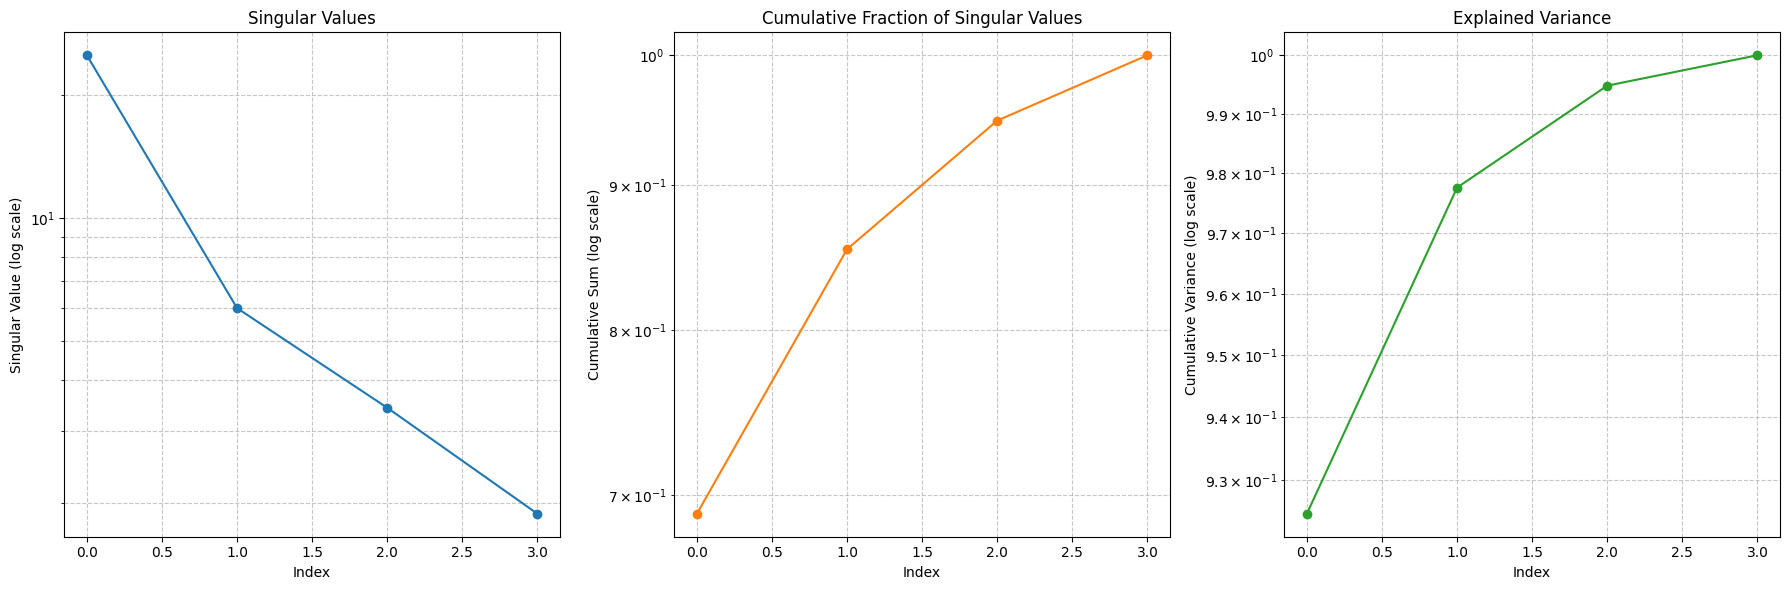

In [ ]:
A_mean = np.mean(A, axis=1)
U, s, VT = np.linalg.svd(A - A_mean[:, None], full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Singular values plot
axs[0].semilogy(s, "o-", color="tab:blue")
axs[0].set_title("Singular Values")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Singular Value (log scale)")
axs[0].grid(True, which="both", linestyle="--", alpha=0.7)

# Cumulative fraction of singular values
cumulative_fraction = np.cumsum(s) / np.sum(s)
axs[1].semilogy(cumulative_fraction, "o-", color="tab:orange")
axs[1].set_title("Cumulative Fraction of Singular Values")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Cumulative Sum (log scale)")
axs[1].grid(True, which="both", linestyle="--", alpha=0.7)

# Explained variance (from squared singular values)
explained_variance = np.cumsum(s**2) / np.sum(s**2)
axs[2].semilogy(explained_variance, "o-", color="tab:green")
axs[2].set_title("Explained Variance")
axs[2].set_xlabel("Index")
axs[2].set_ylabel("Cumulative Variance (log scale)")
axs[2].grid(True, which="both", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Compute a matrix containing the principal components associated with the dataset.


In [8]:
Phi = np.matmul(U.transpose(), A - A_mean[:, None])
Phi.shape

(4, 150)

Generate a scatterplot of the first two principal components of the dataset, grouped by label.


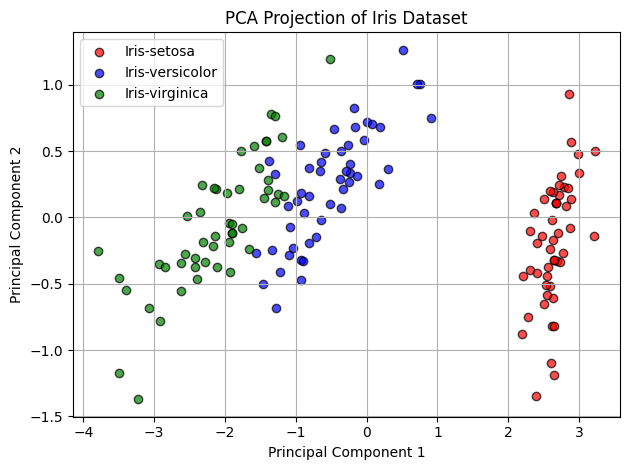

In [ ]:
# Define a color map for the labels
color_map = {
    "Iris-setosa": "r",
    "Iris-versicolor": "b",
    "Iris-virginica": "g",  # assuming these are the three classes
}

# Plot points by class using boolean masks for efficiency and legend labels
for label, color in color_map.items():
    indices = [i for i, lab in enumerate(labels) if lab == label]
    plt.scatter(
        Phi[0, indices],
        Phi[1, indices],
        c=color,
        label=label,
        alpha=0.7,
        edgecolors="k",
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Iris Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Comment on the results of point 4, in light of the results of point 2.


The first two singluar values capture the 98% of the explained variance and by projecting the data in the first two principal components we are able to keep that variance; then we can nearly linearly separate the classes using the first principal component e.g. fixing thresholds (-2.5 and 1.5).


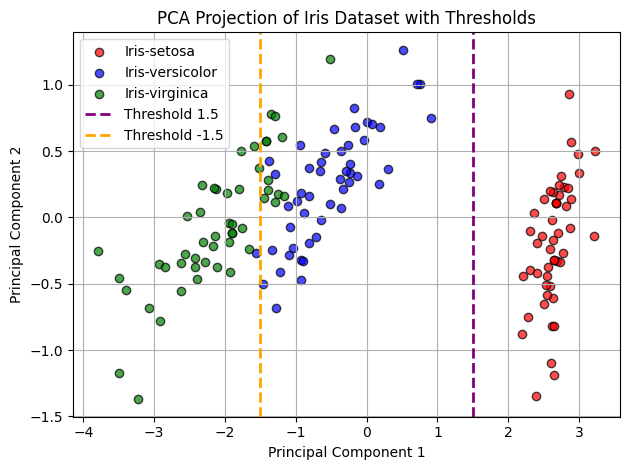

In [16]:
for label, color in color_map.items():
    indices = [i for i, lab in enumerate(labels) if lab == label]
    plt.scatter(
        Phi[0, indices],
        Phi[1, indices],
        c=color,
        label=label,
        alpha=0.7,
        edgecolors="k",
    )

# Add vertical threshold lines on PC1
plt.axvline(x=1.5, color="purple", linestyle="--", linewidth=2, label="Threshold 1.5")
plt.axvline(x=-1.5, color="orange", linestyle="--", linewidth=2, label="Threshold -1.5")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Iris Dataset with Thresholds")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Exercise 2


In [19]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

np.random.seed(0)

Give a brief explaination of the Gradient Descent method and motivate the introduction of the Stochastic Gradient Descent (SGD).


**Gradient Descent:**
Gradient Descent is an optimization algorithm commonly used in machine learning to minimize the cost function or error associated with a model. The goal is to iteratively adjust the parameters of the model to find the minimum of the cost function. The "gradient" refers to the partial derivatives of the cost function with respect to each parameter. By moving in the opposite direction of the gradient, the algorithm seeks to find the minimum.

The basic update rule for gradient descent is:

$$ \theta = \theta - \alpha \cdot \nabla J(\theta) $$

Here, $\theta$ represents the parameters of the model, $\alpha$ is the learning rate (a hyperparameter determining the step size), $J(\theta)$ is the cost function, and $\nabla J(\theta)$ is the gradient of the cost function with respect to \(\theta\).

**Stochastic Gradient Descent (SGD):**
In Stochastic Gradient Descent (SGD), instead of using the entire dataset to compute the gradient in each iteration, only a single random data point (or a small batch of data points) is used. This introduces randomness and noise into the optimization process. The update rule for SGD becomes:

$$ \theta = \theta - \alpha \cdot \nabla J(\theta, x_i, y_i) $$

Here, $(x_i, y_i)$ is a randomly chosen data point from the dataset.

**Motivation for SGD:**
The introduction of Stochastic Gradient Descent is motivated by several factors:

1. **Computational Efficiency:** Computing the gradient using the entire dataset can be computationally expensive, especially for large datasets. SGD allows for faster updates since it only considers a small subset of the data in each iteration.

2. **Noise Introduction:** The randomness introduced by using a single data point or a small batch helps escape local minima and can prevent the algorithm from getting stuck. This can be particularly beneficial in non-convex optimization problems.

3. **Online Learning:** In scenarios where new data is continuously streaming in, SGD allows for online learning, where the model is updated on-the-fly with each new data point, making it adaptable to changing patterns.

4. **Regularization Effect:** The inherent noise in SGD can act as a form of regularization, preventing the model from overfitting to the training data.

Overall, Stochastic Gradient Descent provides a computationally efficient and effective approach for optimizing models, especially in scenarios where large datasets or continuous data streams are involved.


Consider the following dataset:


In [ ]:
m = 100
noise = 1.0
coeff_exact = np.array([5.0, 1.0])
np.random.seed(0)
X = np.c_[[1] * 100, 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)

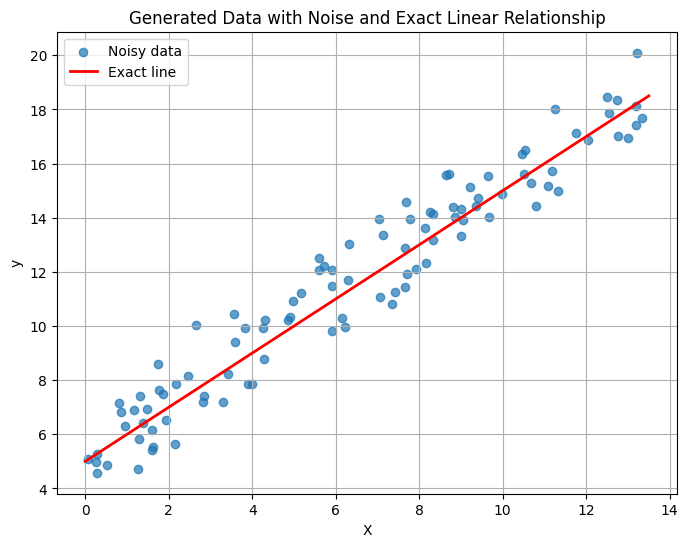

In [ ]:
# Scatter plot of data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, alpha=0.7, label="Noisy data")

# Plot the exact underlying line (without noise)
x_line = np.linspace(0, 13.5, 100)
y_line = coeff_exact[0] + coeff_exact[1] * x_line
plt.plot(x_line, y_line, color="red", linewidth=2, label="Exact line")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data with Noise and Exact Linear Relationship")
plt.legend()
plt.grid(True)
plt.show()

Use the SGD to train a linear model to these data. Initialize the two unknown parameters using `np.random.randn(2)` and find suitable values for the learning rate and for the number of epochs; motivate your choices.


In [ ]:
def MSE(x, y, params):
    return jnp.sqrt(jnp.sum(jnp.square(y - x @ params)))


grad_jit = jax.jit(jax.grad(MSE, argnums=2))
MSE_jit = jax.jit(MSE)


params = np.random.randn(2)

max_epochs = 10000
learning_rate = 0.001
batch_size = 10

for epoch in range(max_epochs):
    batch_idxs = np.random.choice(m, batch_size)
    grads = grad_jit(X[batch_idxs, :], y[batch_idxs], params)
    params -= learning_rate * grads

params

Array([5.2137995, 1.0127926], dtype=float32)

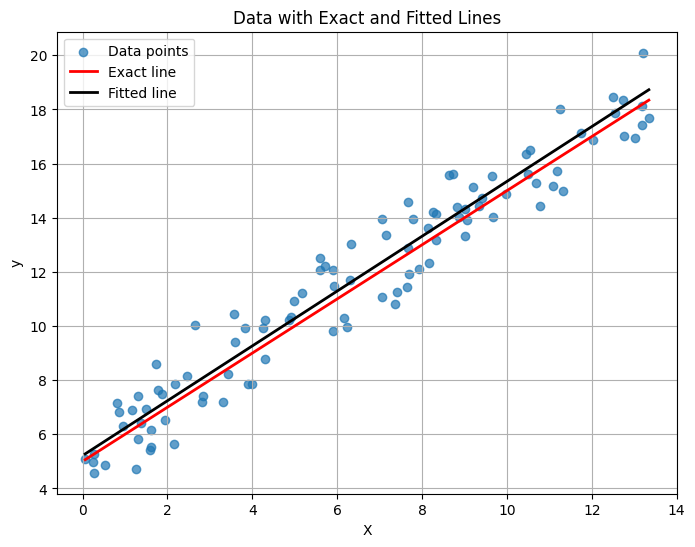

In [ ]:
# Sort data by the second column of X (the feature)
sorted_idx = np.argsort(X[:, 1])
X_sorted = X[sorted_idx]
y_sorted = y[sorted_idx]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, alpha=0.7, label="Data points")

# Plot the exact line (red)
plt.plot(
    X_sorted[:, 1], X_sorted @ coeff_exact, color="red", linewidth=2, label="Exact line"
)

# Plot the fitted line (black)
plt.plot(
    X_sorted[:, 1], X_sorted @ params, color="black", linewidth=2, label="Fitted line"
)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Data with Exact and Fitted Lines")
plt.legend()
plt.grid(True)
plt.show()

By trying different number of epochs, it can be noticed that the line fits very well the data even using half of the original number of epochs so we use `n_epochs = 5000`


We can also try to use different learning rates and evaluate how good the models fit the data. It is important to choose a correct learning rate:

- too big -> unstable results (overshooting the minimum)
- too small -> slow learning / can stuck to local minima

From different trials we choose the value `learning_rate = 0.01`


In [28]:
params = np.random.randn(2)

max_epochs = 5000
learning_rate = 0.01
batch_size = 10

for epoch in range(max_epochs):
    batch_idxs = np.random.choice(m, batch_size)
    grads = grad_jit(X[batch_idxs, :], y[batch_idxs], params)
    params -= learning_rate * grads

params

Array([5.2090073, 1.0104508], dtype=float32)

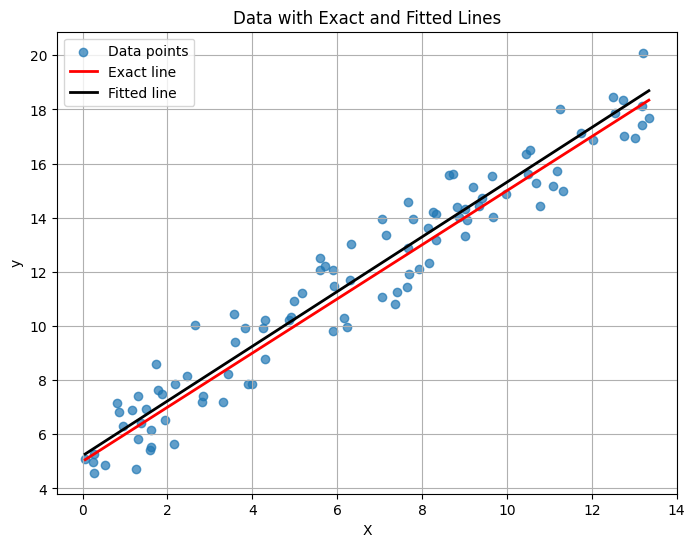

In [ ]:
# Sort data by the second column of X (the feature)
sorted_idx = np.argsort(X[:, 1])
X_sorted = X[sorted_idx]
y_sorted = y[sorted_idx]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, alpha=0.7, label="Data points")

# Plot the exact line (red)
plt.plot(
    X_sorted[:, 1], X_sorted @ coeff_exact, color="red", linewidth=2, label="Exact line"
)

# Plot the fitted line (black)
plt.plot(
    X_sorted[:, 1], X_sorted @ params, color="black", linewidth=2, label="Fitted line"
)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Data with Exact and Fitted Lines")
plt.legend()
plt.grid(True)
plt.show()